## 作業二：Space Titanic

##### **比賽簡介**  
在本次比賽中，你的任務是預測在Space Titanic與時空異常相撞期間，乘客是否被傳送到另一個維度。藉由PassengerId、HomePlanet、CryoSleep、Cabin、Destination、Age、VIP、RoomService、FoodCourt、ShoppingMall、Spa、VRDeck、Name等資料，成功預測出何者成功傳送(存活)。  

資料來源：https://www.kaggle.com/competitions/spaceship-titanic/data

##### **為甚麼選擇這個比賽**
老師在上課時有提到這個比賽跟鐵達尼號生存預測十分相似，是機器學習新手入門的好選擇，再加上稍微看了比賽簡介，覺得內容的背景設定很科幻、很有趣，因此想選擇這個比賽作為作業。  

#### **資料集、目標介紹**
PassengerId- 每位乘客的唯一ID。  
HomePlanet- 乘客的母星球。  
CryoSleep- 指示乘客在航行期間是否執行低溫睡眠，此行為會將乘客限制於客艙內。  
Cabin- 乘客所住的艙位號。採用形式：deck/num/side  
Destination- 乘客將要前往的星球。  
Age- 乘客的年齡。  
VIP- 旅客在航程中是否支付了VIP費用。  
FoodCourt、ShoppingMall、Spa、VRDeck - 乘客在眾多豪華設施中收取的金額。  
Name- 乘客的姓名。  
Transported- 乘客是否被運送到另一個維度(存活)。  

資料來源：https://www.kaggle.com/competitions/spaceship-titanic/data

## 實作過程

In [4]:
# import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# import dataset
df = pd.read_csv("train.csv")
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


把與生存無關的變數刪掉：  
1.推測名字、編號、原居住地等個人資料，與生存無關  
2.在船上的奢侈品消費也與生存無關

In [6]:
df.drop(['Name','PassengerId'],axis=1,inplace=True)
df.drop(['HomePlanet','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','VIP'],axis=1,inplace=True)

In [7]:
df.head()

,CryoSleep,Cabin,Destination,Age,Transported
0,False,B/0/P,TRAPPIST-1e,39.0,False
1,False,F/0/S,TRAPPIST-1e,24.0,True
2,False,A/0/S,TRAPPIST-1e,58.0,False
3,False,A/0/S,TRAPPIST-1e,33.0,False
4,False,F/1/S,TRAPPIST-1e,16.0,True


檢查是否有空值超過一半的情形

In [8]:
df.isnull().sum() > len(df)/2 

CryoSleep      False
Cabin          False
Destination    False
Age            False
Transported    False
dtype: bool

### 資料處理及驗證

將上述排除後，剩下的條件有Destionation、Age、CryoSleep  
接下來就這三項進行資料整理，並同時驗證是否和生存率有關係：

#### Destination

In [9]:
# 將目的地缺失值以最多數填補
df['Destination'].value_counts().idxmax()
df['Destination'].fillna(df['Destination'].value_counts().idxmax(),inplace=True)
# 因為Destination的值非0、1，需要把各項分開才能進行機器學習
df = pd.get_dummies(data=df, dtype = int, columns= ['Destination'])

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


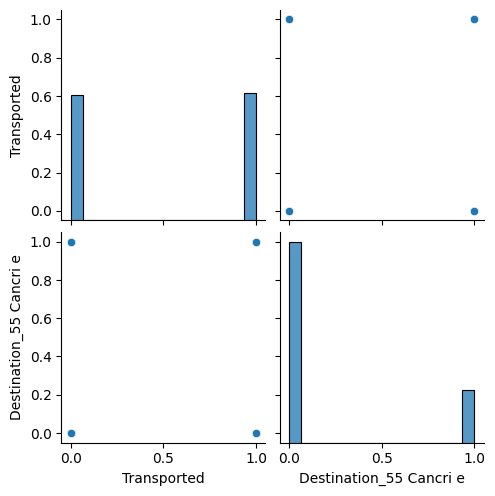

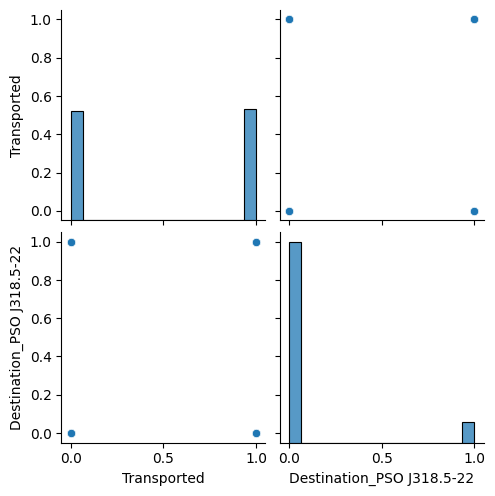

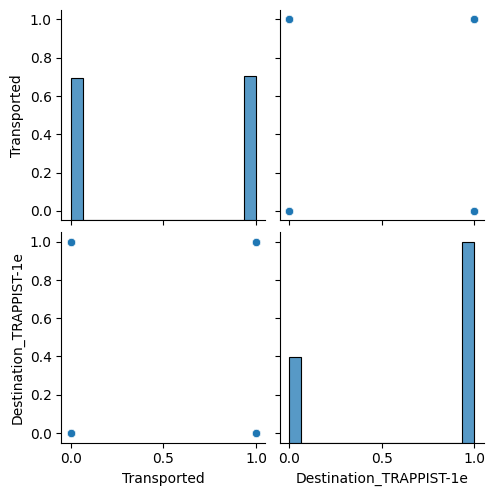

In [10]:
# 將分開後的Destination作圖，驗證生存率和目的地是真的有關聯
sns.pairplot(df[['Transported','Destination_55 Cancri e']],dropna=True)
sns.pairplot(df[['Transported','Destination_PSO J318.5-22']],dropna=True)
sns.pairplot(df[['Transported','Destination_TRAPPIST-1e']],dropna=True)

由上圖可以發現目的地和生存率是有關聯的：  
1.死亡多：Destination_55 Cancri e、Destination_PSO J318.5-22  
2.存活多：Destination_TRAPPIST-1e

#### Age

In [11]:
# 將年齡缺失值以中位數填補
df['Age'].isnull().value_counts()
median_age = df['Age'].median()
df['Age'].fillna(median_age, inplace=True)

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


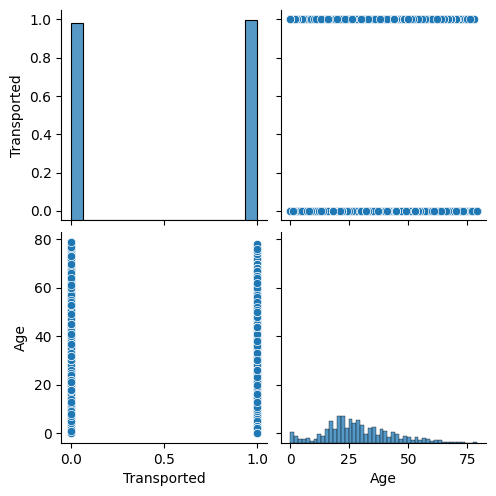

In [12]:
sns.pairplot(df[['Transported','Age']],dropna=True)

Transported座標中，0.0和1.0不同年齡點的疏密分布不同，故生存率和年齡有關係

#### CryoSleep 

In [13]:
# 將缺失值以最多數填補
df['CryoSleep'].value_counts().idxmax()
df['CryoSleep'].fillna(df['CryoSleep'].value_counts().idxmax(),inplace=True)
# 形式為True or False，需要將其轉換為數字
df = pd.get_dummies(data=df, dtype = int, columns= ['CryoSleep'])


In [14]:
df.head()

,Cabin,Age,Transported,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,CryoSleep_False,CryoSleep_True
0,B/0/P,39.0,False,0,0,1,1,0
1,F/0/S,24.0,True,0,0,1,1,0
2,A/0/S,58.0,False,0,0,1,1,0
3,A/0/S,33.0,False,0,0,1,1,0
4,F/1/S,16.0,True,0,0,1,1,0


<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


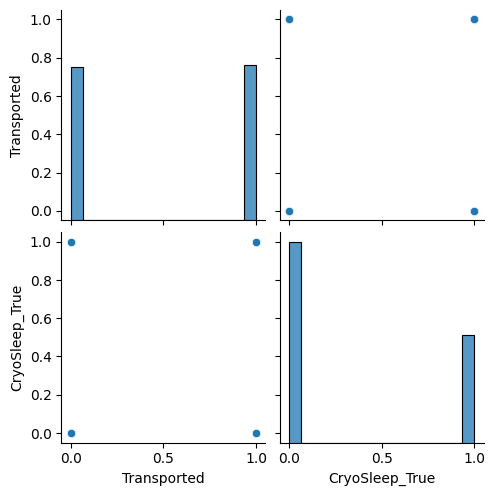

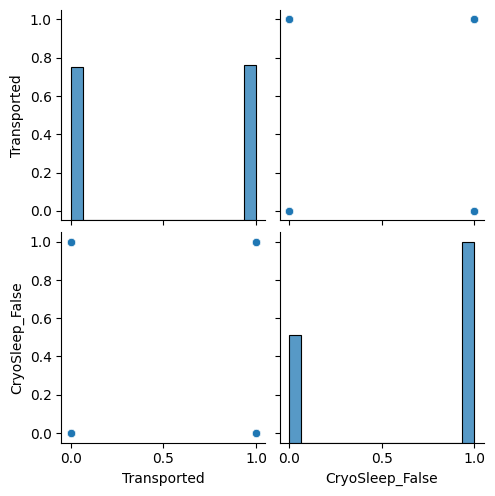

In [15]:
# 將CryoSleep作圖驗證關聯性
sns.pairplot(df[['Transported','CryoSleep_True']],dropna=True)
sns.pairplot(df[['Transported','CryoSleep_False']],dropna=True)


由上圖可以發現目的地和生存率是有關聯的：  
1.CryoSleep_True：死亡多  
2.CryoSleep_False：存活多

#### Cabin

cabin中包含了3項資訊，分別是desk、num、side，故我將此行切割進行分析  
我認為num與生存直觀上沒有關聯性，故只就desk與side探討關聯：

In [16]:
# 空值以最多少數填補(假設座位數相同，少的值可視為缺失，否則全部都擠在同樣的方向違反常理)
df[['desk', 'num', 'side']] = df['Cabin'].str.split('/', expand=True)
df['Cabin'].value_counts().idxmin()
df['Cabin'].fillna(df['Cabin'].value_counts().idxmax(),inplace=True)

>num 無關，刪除

In [17]:
 
df.drop(['num'],axis=1,inplace = True)

>side

In [18]:
df = pd.get_dummies(data=df, dtype = int, columns= ['side'])


<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


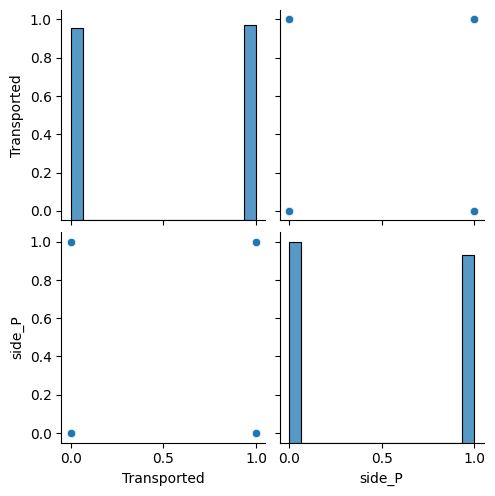

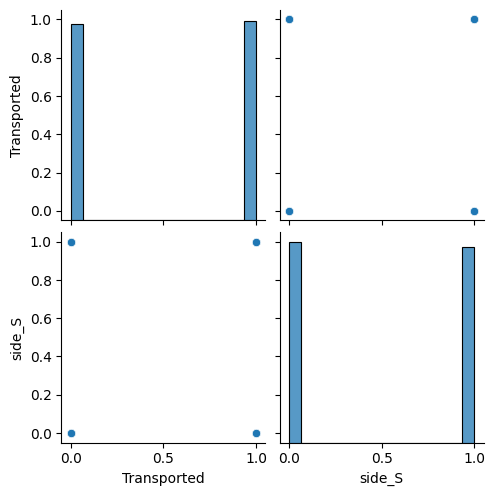

In [19]:
sns.pairplot(df[['Transported','side_P']],dropna=True)
sns.pairplot(df[['Transported','side_S']],dropna=True)

>desk

In [20]:
df = pd.get_dummies(data=df, dtype = int, columns= ['desk'])

In [21]:
df.head()

,Cabin,Age,Transported,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,CryoSleep_False,CryoSleep_True,side_P,side_S,desk_A,desk_B,desk_C,desk_D,desk_E,desk_F,desk_G,desk_T
0,B/0/P,39.0,False,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0
1,F/0/S,24.0,True,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0
2,A/0/S,58.0,False,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0
3,A/0/S,33.0,False,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0
4,F/1/S,16.0,True,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0


<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


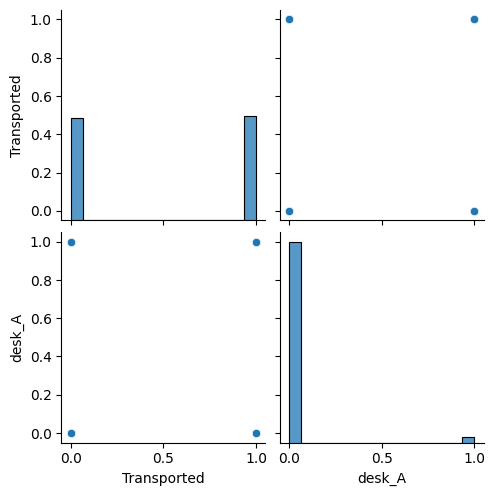

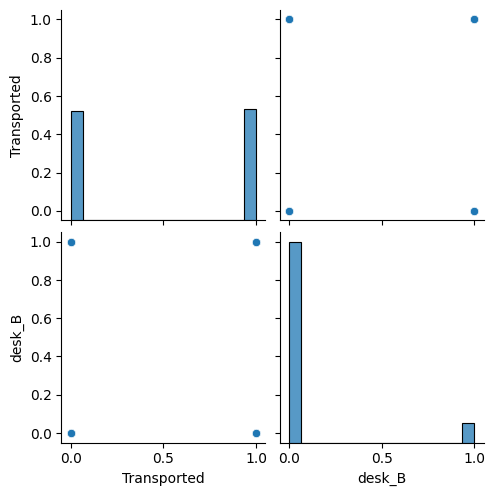

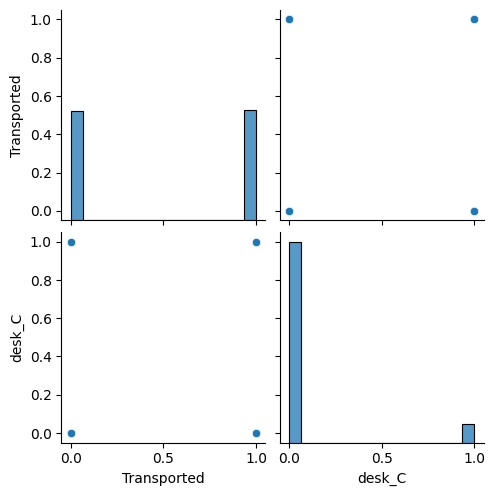

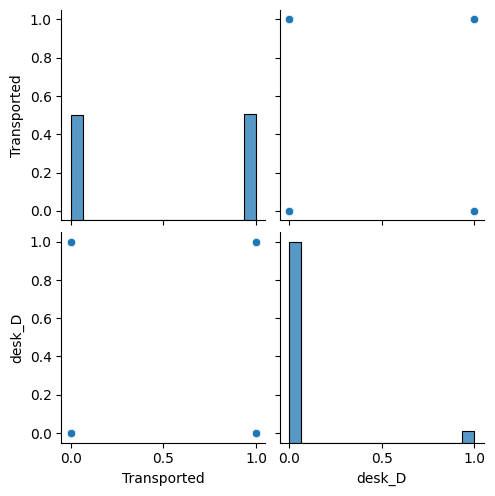

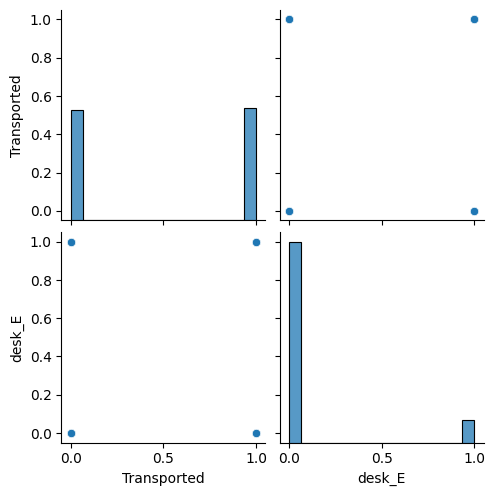

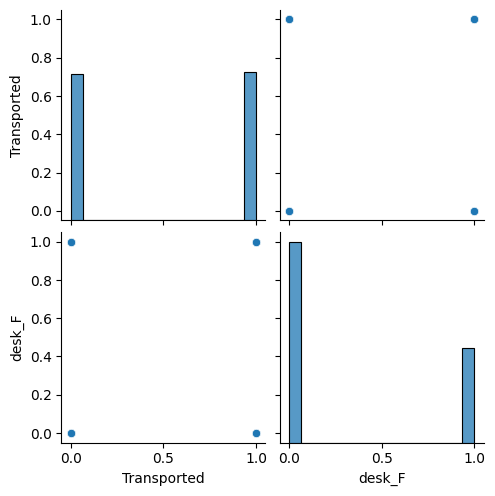

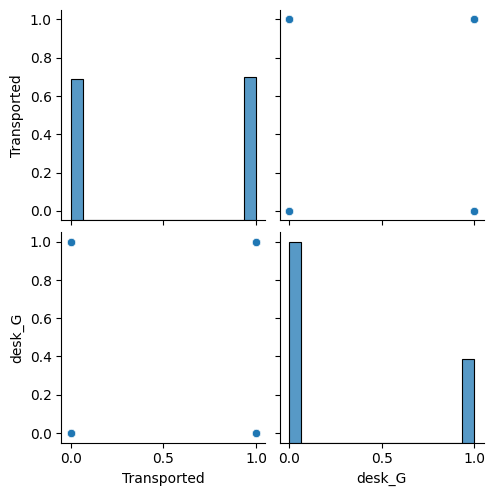

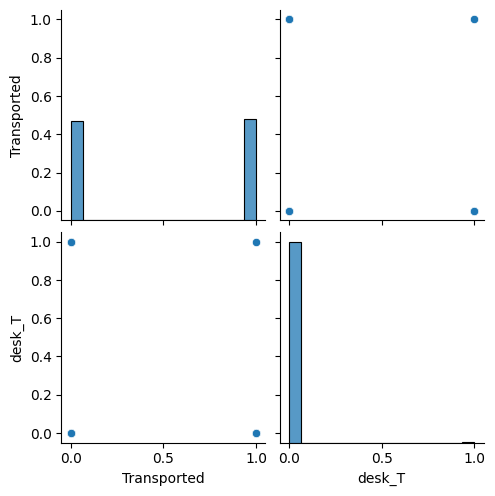

In [22]:
sns.pairplot(df[['Transported','desk_A']],dropna=True)
sns.pairplot(df[['Transported','desk_B']],dropna=True)
sns.pairplot(df[['Transported','desk_C']],dropna=True)
sns.pairplot(df[['Transported','desk_D']],dropna=True)
sns.pairplot(df[['Transported','desk_E']],dropna=True)
sns.pairplot(df[['Transported','desk_F']],dropna=True)
sns.pairplot(df[['Transported','desk_G']],dropna=True)
sns.pairplot(df[['Transported','desk_T']],dropna=True)

藉由作圖，可以發現cabin中的side對生存率無影響，而desk對生存率有影響，故把side刪掉便於做後續處理

In [23]:
df.drop(['side_P'],axis=1,inplace = True)
df.drop(['side_S'],axis=1,inplace = True)
df.drop(['Cabin'],axis=1,inplace = True)

確認表格內的資料無誤且無空值

In [24]:
df.isnull().sum()

Age                          0
Transported                  0
Destination_55 Cancri e      0
Destination_PSO J318.5-22    0
Destination_TRAPPIST-1e      0
CryoSleep_False              0
CryoSleep_True               0
desk_A                       0
desk_B                       0
desk_C                       0
desk_D                       0
desk_E                       0
desk_F                       0
desk_G                       0
desk_T                       0
dtype: int64

### 機器學習前處理

In [25]:
X = df.drop(['Transported'],axis=1)
y = df['Transported']

### 機器學習

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=67)

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=200)
lr.fit(X_train,y_train)
predictions = lr.predict(X_test)

from sklearn.metrics import confusion_matrix,accuracy_score, recall_score, precision_score
accuracy_score(y_test,predictions)
recall_score(y_test,predictions)
precision_score(y_test,predictions)
pd.DataFrame(confusion_matrix(y_test,predictions),columns=['Predictnot Survived', 'PredictSurvived'],index=['Truenot Survived','TrueSurvived'])


,Predictnot Survived,PredictSurvived
Truenot Survived,1067,229
TrueSurvived,482,830


### 匯出模型

In [27]:
import joblib
joblib.dump(lr,'Spaceship-LR-20231114.pkl',compress=3)

['Spaceship-LR-20231114.pkl']

#### **跟上課內容關聯**
我覺得這個比賽的目標和課程中的鐵達尼號生存預測幾乎一模一樣，同樣是藉由各種乘客資訊預測意外發生後的死活。在資料處理時可以運用課堂所學，例如：年齡以中位數填補、最大最小值的運用，以及刪減資料的原則等。而在機器學習的部分由於整體概念相同，也可以直接套入課堂的程式碼進行預測，讓我藉由重複練習，對上課內容有更深的印象及活用的機會。

#### **延伸學習**
這次的作業讓我對dataframe的處理更加熟悉，不管是在column範圍的選取、get dummies的資料型態轉換方式，抑或是fillna空值填補的過程，因為要進行多次運用，我仔細查詢了語法每字每句的用途。也因為要將for_submission及原始模型的資料完全配對，我學到了先將須使用的資料從原始資料提出，再對原資料進行刪除填補的方式，對我來說這樣的邏輯更為清晰，過程也比較簡單避免error。

**比賽結果可見hw2_for_submission.ipynb**